## Observations and Insights 

In [23]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df, on = "Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Check the number of mice.
mice_count = merged_df["Mouse ID"].nunique()
mice_count

249

In [25]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
merged_df.duplicated(subset = ["Mouse ID", "Timepoint"]).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [26]:
# Drop any duplicate rows
merged_df.drop_duplicates(["Mouse ID", "Timepoint"]).head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Recheck the number of mice
mice_count_check = merged_df["Mouse ID"].nunique()
mice_count_check

249

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
tumor_volume_mean = merged_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_volume_median = merged_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_volume_variance = merged_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_stdev = merged_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_sem = merged_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

drug_reg_summary_df = pd.DataFrame({"Tumor Volume Mean" : tumor_volume_mean, 
                                      "Tumor Volume Median" : tumor_volume_median, 
                                      "Tumor Volume Variance" : tumor_volume_variance, 
                                     "Tumor Volume Standard Deviation" : tumor_volume_stdev, 
                                     "Tumor Volume SEM" : tumor_volume_sem}).round(2)

drug_reg_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [29]:
drug_regimen_data_points = merged_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

x_axis = np.arange(len(drug_regimen_data_points))

drug_regimen_count_df = pd.DataFrame({"Drug Regimen" : drug_regimen_data_points})

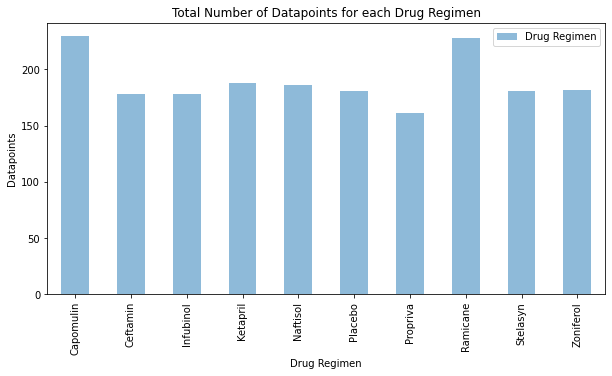

In [30]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
drug_regimen_count_df.plot.bar(alpha = 0.5, align = "center", figsize = (10,5))

plt.title("Total Number of Datapoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Datapoints")

plt.savefig('pandas_bar_plot_1.png', dpi=72, bbox_inches='tight')

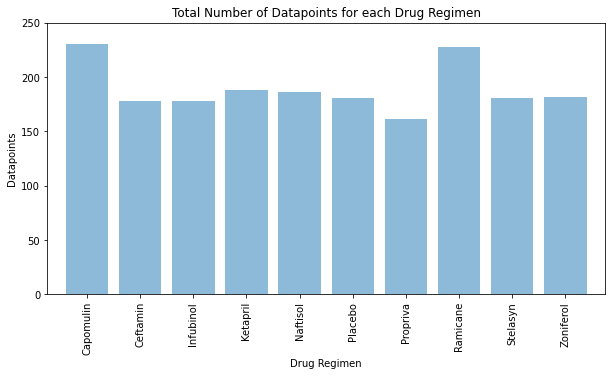

In [31]:
# General identical bar plot using pyplot instead of pandas.
plt.figure(figsize = (10,5))
plt.bar(x_axis, drug_regimen_data_points, alpha = 0.5, align = "center")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_regimen_data_points)+20)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drug_regimen_count_df.index.values, rotation = "vertical")

plt.title("Total Number of Datapoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Datapoints")

plt.savefig('plt_bar_plot.png', dpi=72, bbox_inches='tight')

In [32]:
sex_distribution = merged_df.groupby(["Sex"]).count()["Mouse ID"]

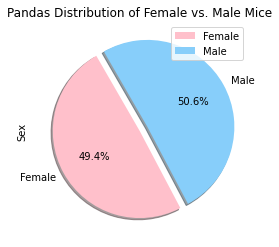

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution_df = pd.DataFrame({"Sex" : sex_distribution})

explode = (0, 0.1)
colors = ["pink", "lightskyblue"]


sex_distribution_df.plot.pie(y = 'Sex', explode = explode, shadow = True, colors = colors, autopct="%1.1f%%", 
                             title = "Pandas Distribution of Female vs. Male Mice", startangle = 120)

plt.savefig('pandas_pie_plot.png', dpi=72, bbox_inches='tight')

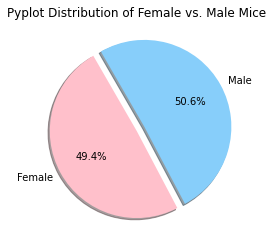

In [34]:
# Generate identical pie plot using pyplot
labels = ["Female", "Male"]

explode = (0, 0.1)

colors = ["pink", "lightskyblue"]

plt.pie(sex_distribution, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", 
        shadow = True, startangle = 120)

plt.title("Pyplot Distribution of Female vs. Male Mice")

plt.savefig('plt_pie_plot.png', dpi=72, bbox_inches='tight')

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

new_merged_df = merged_df.set_index("Mouse ID")

some_drug_regimens_df = new_merged_df.loc[(new_merged_df["Drug Regimen"] == "Capomulin") | 
                                   (new_merged_df["Drug Regimen"] == "Ramicane") | 
                                   (new_merged_df["Drug Regimen"] == "Infubinol") |
                                   (new_merged_df["Drug Regimen"] == "Ceftamin"), :]

per_mouse = some_drug_regimens_df.groupby("Mouse ID")

final_tumor_volume = per_mouse['Tumor Volume (mm3)'].tail(1)

mouse_drug_regimen = per_mouse['Drug Regimen'].tail(1)

final_tumor_volume_per_mouse_df = pd.DataFrame({"Drug Regimen" : mouse_drug_regimen,
                                                "Final Tumor Volume" : final_tumor_volume})

final_tumor_volume_per_mouse_df.head()

,Drug Regimen,Final Tumor Volume
Mouse ID,,
k403,Ramicane,22.050126
s185,Capomulin,23.343598
x401,Capomulin,28.484033
m601,Capomulin,28.430964
g791,Ramicane,29.128472


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [36]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

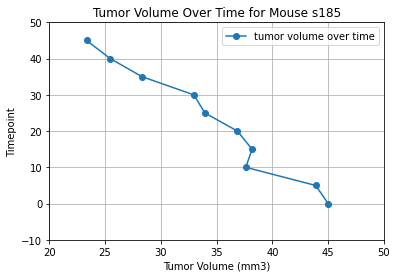

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
s185_capomulin_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") 
                                       & (merged_df["Mouse ID"] == "s185"), :]

s185_tumor_vol = s185_capomulin_df["Tumor Volume (mm3)"]
s185_time_point = s185_capomulin_df["Timepoint"]

s185_line_plot = plt.plot(s185_tumor_vol, s185_time_point, marker = "o", label = "tumor volume over time")

plt.legend(loc = "upper right")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title("Tumor Volume Over Time for Mouse s185")

plt.xlim(20, 50)
plt.ylim(-10, 50)

plt.grid()

plt.savefig('line_plot.png', dpi=72, bbox_inches='tight')

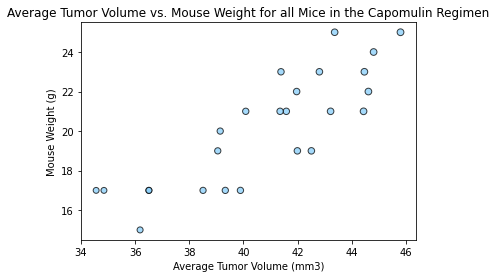

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
capomulin_only_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin"), :]

avg_tumor_volume = capomulin_only_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

mouse_weight = capomulin_only_df.groupby(["Mouse ID"]).mean()["Weight (g)"]

x_axis = avg_tumor_volume
y_axis = mouse_weight

plt.scatter(x_axis, y_axis, marker = "o", facecolors = "lightskyblue", edgecolors = "black", s = x_axis, alpha = 0.75)

plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Average Tumor Volume vs. Mouse Weight for all Mice in the Capomulin Regimen")

plt.savefig('scatter_plot.png', dpi=72, bbox_inches='tight')

## Correlation and Regression

The correlation between average tumor volume and mouse weight is 0.84.


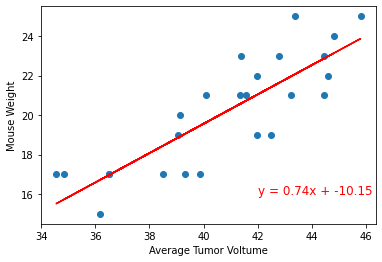

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_axis, y_axis)

print(f"The correlation between average tumor volume and mouse weight is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)

plt.plot(x_axis, regress_values,"r-")

plt.xlabel('Average Tumor Voltume')
plt.ylabel('Mouse Weight')

plt.annotate(line_eq,(42,16), fontsize = 12, color = "red")

plt.show()

# Observations and Insights